In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import monai
#from Dataset import DatasetColorectal

/home/DIINF/jcurimil/anaconda3/envs/maskformer/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/DIINF/jcurimil/anaconda3/envs/maskformer/lib/python3.9/site-packages/monai/utils/tf32.py:66: UserWarning: torch.backends.cuda.matmul.allow_tf32 = True by default.
  This value defaults to True when PyTorch version in [1.7, 1.11] and may affect precision.
  See https://docs.monai.io/en/latest/precision_accelerating.html#precision-and-accelerating
  warnings.warn(


In [2]:
from segment_anything.modeling import (
    ImageEncoderViT,
    PatchEmbed,
    MaskDecoder,
    PromptEncoder,
    Sam,
    TwoWayTransformer,
    Block,
)
from functools import partial
import torch
from torch import nn
import pandas as pd

In [3]:
encoder_embed_dim=768
encoder_depth=12
encoder_num_heads=12
encoder_global_attn_indexes=[2, 5, 8, 11]
image_size=512
prompt_embed_dim = 256
vit_patch_size = 16
image_embedding_size = image_size // vit_patch_size
image_encoder=ImageEncoderViT(
            depth=encoder_depth,
            embed_dim=encoder_embed_dim,
            img_size=image_size,
            mlp_ratio=4,
            norm_layer=partial(torch.nn.LayerNorm, eps=1e-6),
            num_heads=encoder_num_heads,
            patch_size=vit_patch_size,
            qkv_bias=True,
            use_rel_pos=True,
            global_attn_indexes=encoder_global_attn_indexes,
            window_size=14,
            out_chans=prompt_embed_dim,
        )

In [5]:
Data=DatasetColorectal(dir_orig,mode="Train")

In [4]:
aa=torch.tensor([Data[30][0][0:3]]).float()
bb=torch.tensor([Data[30][1][1]]).float()[None,:]
print(np.shape(bb))

NameError: name 'Data' is not defined

In [9]:
dir_project = "../../manifest-1669817128730/"
dir_orig = dir_project + "Colorectal-Liver-Metastases/"

In [33]:
Data_train=DatasetColorectal(dir_orig,mode="Train")
Data_val=DatasetColorectal(dir_orig,mode="Val")

In [34]:
np.shape(Data_train[0][0])

(2, 151, 512, 512)

In [88]:
ii=torch.Tensor(Data_train[0][1])

In [71]:
np.shape(ii.unsqueeze(0).unsqueeze(0))

torch.Size([1, 1, 151, 512, 512])

In [73]:
np.shape(ii[None,None,...])

torch.Size([1, 1, 151, 512, 512])

In [59]:
batch_size, c, h, w = 1, 3, 4, 4
x  = torch.randn(batch_size, c, h, w)
x.unsqueeze(2).shape

torch.Size([1, 3, 1, 4, 4])

In [91]:
from skimage import io
import imageio
gif_path = 'animation.gif'
imageio.mimsave(gif_path, np.array(image_resize[0][0]*255).astype(np.uint8))

In [15]:
from torch.utils.data import  DataLoader
nice_train_loader = DataLoader(Data_train, batch_size=2, shuffle=True, pin_memory=True)
nice_val_loader = DataLoader(Data_val, batch_size=2, shuffle=False, pin_memory=True)

In [26]:

kfold1=kfold_group(alls,1)

ModuleNotFoundError: No module named 'pandas'

In [11]:
def print_len(kfold1,kfold2,kfold3,kfold4,kfold5):
    k1,k2,k3,k4,k5=len(kfold1),len(kfold2),len(kfold3),len(kfold4),len(kfold5)
    print("len kfold 1: ",k1)
    print("len kfold 2: ",k2)
    print("len kfold 3: ",k3)
    print("len kfold 4: ",k4)
    print("len kfold 5: ",k5)
    print("len total: ",k1+k2+k3+k4+k5)

In [41]:
from sklearn.model_selection import GroupShuffleSplit
import pandas as pd
def print_len(kfold1,kfold2,kfold3,kfold4,kfold5):
    k1,k2,k3,k4,k5=len(kfold1),len(kfold2),len(kfold3),len(kfold4),len(kfold5)
    print("len kfold 1: ",k1)
    print("len kfold 2: ",k2)
    print("len kfold 3: ",k3)
    print("len kfold 4: ",k4)
    print("len kfold 5: ",k5)
    print("len total: ",k1+k2+k3+k4+k5)
    
def separation_fold(dataset,tsize,seed=42):
    splitter = GroupShuffleSplit(test_size=tsize, n_splits=5, random_state = seed)
    split = splitter.split(dataset, groups=dataset["patient"])
    kfold_1, kfold_2 = next(split)
    kfold1 = dataset.iloc[kfold_1]
    kfold2 = dataset.iloc[kfold_2]
    #Verification
    kfold1_patients=np.unique(kfold1["patient"])
    kfold2_patients=np.unique(kfold2["patient"])
    count=0 
    for patient in kfold1_patients:
        if patient in kfold2_patients:
            count+=1
    assert count == 0, "Bad Separations"
    return kfold1,kfold2
    
def separation(lista_total):
    train,kfold1=separation_fold(lista_total,0.2)
    kfold23,kfold45=separation_fold(train,0.5)
    kfold2,kfold3=separation_fold(kfold23,0.5)
    kfold4,kfold5=separation_fold(kfold45,0.5)
    kfold1=list(kfold1["name"])
    kfold2=list(kfold2["name"])
    kfold3=list(kfold3["name"])
    kfold4=list(kfold4["name"])
    kfold5=list(kfold5["name"])
    count=0
    for i in range(5):
        kfolds=[kfold1,kfold2,kfold3,kfold4,kfold5]
        ktest=kfolds.pop(i)
        for k in range(4):
            for j in ktest:
                if j in kfolds[k]:
                    count+=1
                    print(j)
    assert count == 0, "Bad Separations"
    print_len(kfold1,kfold2,kfold3,kfold4,kfold5)
    return [kfold1,kfold2,kfold3,kfold4,kfold5]

In [42]:
def kfold_group(data,kfold,seed=42):
    data_info=[]
    for name in data:
        info={}
        info["name"]=name
        name_wp=name.split(".")[0].split("-")
        info["patient"]=name_wp[2].split("_")[0]
        info["slide"]=name_wp[3]
        data_info.append(info)
    pd_data=pd.DataFrame.from_dict(data_info)
    kfolds=separation(pd_data)
    """
    kval=kfolds.pop(kfold-1)
    ktrain=[]
    for i in kfolds:
        ktrain.extend(i)
    np.random.seed(seed)
    np.random.shuffle(kval)
    np.random.shuffle(ktrain)
    return kval,ktrain
    """
    return pd_data,kfolds

In [43]:
dire="../../manifest-1669817128730/data_resize/masks/"
alls=os.listdir(dire)
kfolds=kfold_group(alls,1)

len kfold 1:  2164
len kfold 2:  2175
len kfold 3:  2056
len kfold 4:  1937
len kfold 5:  1932
len total:  10264


In [44]:
pd_datas=[]
for kf in kfolds[1]:
    data_info=[]
    for name in kf:
        info={}
        info["name"]=name
        name_wp=name.split(".")[0].split("-")
        info["patient"]=name_wp[2].split("_")[0]
        info["slide"]=name_wp[3]
        data_info.append(info)
    pd_data=pd.DataFrame.from_dict(data_info).sort_values(by=["patient","slide"]) 
    pd_datas.append(pd_data)

In [90]:
pd_datas[1]

,name,patient,slide
0,CRLM-CT-1003_1-006.npy,1003,006
1,CRLM-CT-1003_1-007.npy,1003,007
2,CRLM-CT-1003_1-008.npy,1003,008
3,CRLM-CT-1003_1-009.npy,1003,009
4,CRLM-CT-1003_1-010.npy,1003,010
...,...,...,...
2170,CRLM-CT-1196_1-109.npy,1196,109
2171,CRLM-CT-1196_1-110.npy,1196,110
2172,CRLM-CT-1196_1-111.npy,1196,111
2173,CRLM-CT-1196_1-112.npy,1196,112


In [72]:
for i, pd_data in enumerate(pd_datas):
    print(i)

0
1
2
3
4


In [75]:
import csv
for ind, pd_data in enumerate(pd_datas):
    largo=len(pd_data)
    prev_patient=0
    new_data_info=[]
    for i in range(largo-1):
        slide=pd_data.iloc[i]
        next_slide=pd_data.iloc[i+1]
        patient=slide["patient"]
        next_patient=next_slide["patient"]
        if patient!=prev_patient:
            prev_patient=patient
            continue
        elif patient!=next_patient:
            continue
        else:
            prev_slide=pd_data.iloc[i-1]
            info={}
            name_wp=slide["name"].split(".")[0].split("-")
            info["patient"]=name_wp[2].split("_")[0]
            info["t_slice"]=name_wp[3]
            info["t-1"]=prev_slide["name"]
            info["t"]=slide["name"]
            info["t+1"]=next_slide["name"]        
            new_data_info.append(info)
    pd_new_data=pd.DataFrame.from_dict(new_data_info).sort_values(by=["patient","t_slice"]) 
    pd_new_data.to_csv(f"fold_{ind+1}.csv", index=False)  

In [65]:
dicts=pd_new_data.to_dict('records')

In [94]:
type(fold1)

list

In [11]:
fold1=pd.read_csv('Dataset/fold_1.csv')
fold2=pd.read_csv('Dataset/fold_2.csv')
fold3=pd.read_csv('Dataset/fold_3.csv')
fold4=pd.read_csv('Dataset/fold_4.csv')
fold5=pd.read_csv('Dataset/fold_5.csv')

#result = pd.concat([fold1,fold2])

#print(len(fold1),len(fold2),len(fold3),len(fold4),len(fold5),len(result))

In [19]:
def read_file(folder,file):
    prev_slide=np.load(folder+file["t-1"])
    slide=np.load(folder+file["t"])
    next_slide=np.load(folder+file["t+1"])
    return np.stack([prev_slide,slide,next_slide], axis=2)
file=fold1.to_dict('records')[256]
new=read_file("../../manifest-1669817128730/data_resize/images/",file)


In [37]:
nn=new-1024.0

MEAN = [0.485, 0.456, 0.406] 
STD  = [0.229, 0.224, 0.225]

img_min, img_max = -360, 440 #  (-17,201) # Estadistica de los datos (0.5%, 99.5%) pixeles que pertecen a las clases
nn = np.clip(nn, img_min, img_max)
nn = (nn - img_min) / (img_max - img_min)
nn = ((nn) - MEAN ) / STD
print(np.shape(nn))
        
# (h,w,c) -> (c,h,w)  
img  = np.transpose(nn,  (2,0,1)).astype(np.float32) #(c,h,w)
print(np.shape(img))

img= torch.Tensor(img)      
print(np.shape(img))

(256, 256, 3)
(3, 256, 256)
torch.Size([3, 256, 256])


In [13]:
xd=np.load("../../manifest-1669817128730/data_resize/masks/CRLM-CT-1001_1-020.npy")


In [21]:
from utils.metrics import calculate_metric_percase
import torch.nn.functional as F
import torch
def eval_model(model,device,test_dl,num_classes,num_test):
    # Load the model
    #model = load_model(filepath,device)
    model.eval()
        
    iou  = np.zeros((num_classes,num_test))
    dice = np.zeros((num_classes,num_test))
    metric_history={ "miou": [], "mdice": []}
    cci = np.zeros((1,num_classes))
    m = 0
    patient_prev=0
    target_prev=torch.Tensor(np.zeros((1,1,256,256)))
    with torch.inference_mode():
        for img, target, _, patient, _ in tqdm(test_dl):
            target=target.cpu()
            if patient[0].numpy()!=patient_prev:
                target_prev=torch.Tensor(np.zeros((1,1,256,256)))
            output = model(img.to(device),target_prev.to(device))
            target_prev=output
            output = output.cpu() # (N,C,H,W)
            target=target[:,0,:,:].type(torch.long) # (N,1,H,W)
            pred = F.softmax(output,dim=1) # (N,C,H,W)
            preds = torch.argmax(pred, 1)  # (N,H,W)
            patient_prev=patient[0].numpy()
            for i in range(len(preds)):
                gt = F.one_hot(target[i],num_classes=num_classes).permute(2,0,1).contiguous()
                pd = F.one_hot(preds[i],num_classes=num_classes).permute(2,0,1).contiguous()
                cc = 0
                for j in range(num_classes):
                    iou[j,m], dice[j,m], ci = calculate_metric_percase(np.array(pd[j]), np.array(gt[j]))
                    cc += ci 
                    cci[0,j] += ci
                    
                metric_history["miou"].append(np.sum(iou[:,m])/cc)
                metric_history["mdice"].append(np.sum(dice[:,m])/cc)
                m = m + 1;
    iou5c=sum(metric_history["miou"])/m
    dice5c=sum(metric_history["mdice"])/m
    iou4c=0.25*(np.sum(iou[1,:])/cci[0,1] + np.sum(iou[2,:])/cci[0,2]+np.sum(iou[3,:])/cci[0,3] + np.sum(iou[4,:])/cci[0,4])
    dice4c=0.25*(np.sum(dice[1,:])/cci[0,1] + np.sum(dice[2,:])/cci[0,2]+np.sum(dice[3,:])/cci[0,3] + np.sum(dice[4,:])/cci[0,4])
    print("---Metrics (Image)---")
    print("     (  BG,     LV,     HV,     PV,     TM)")
    print("IoU  : (%.4f, %.4f, %.4f, %.4f, %.4f)" % (np.sum(iou[0,:])/cci[0,0], np.sum(iou[1,:])/cci[0,1], np.sum(iou[2,:])/cci[0,2], np.sum(iou[3,:])/cci[0,3], np.sum(iou[4,:])/cci[0,4]))
    print("Dice : (%.4f, %.4f, %.4f, %.4f, %.4f)" % (np.sum(dice[0,:])/cci[0,0], np.sum(dice[1,:])/cci[0,1], np.sum(dice[2,:])/cci[0,2], np.sum(dice[3,:])/cci[0,3], np.sum(dice[4,:])/cci[0,4]))
    print("mIoU (5c)  : %.4f" % iou5c)
    print("mDice (5c) : %.4f" % dice5c)
    print("mIoU (4c)  : %.4f" % iou4c)
    print("mDice (4c) : %.4f" % dice4c)
    print("Sin LV - HV - PV - TM: (%.0f, %.0f, %.0f, %.0f)" %  (m - cci[0,1], m - cci[0,2], m - cci[0,3], m - cci[0,4] ) )  
    
    return iou5c,dice5c,iou4c,dice4c

In [22]:
import os

import numpy as np
import torch
import torch.utils.data
from sklearn.model_selection import train_test_split
import torchvision.transforms as T

class DatasetColorectal2D(torch.utils.data.Dataset):
    def __init__(self, csv_dir,img_path,mask_path, kfold, mode, preprocessing=None, transform=None):
        """
        Args:
            img_dir: Image file directory.
            kfold: kfold to use in validation.
            mode: 'Train', 'Val' or 'Test'.
            transform (Compose, optional): Compose transforms of albumentations. Defaults to None.
            preprocess (Compose, optional): Compose preprocess. Defaults to None.
        """
        if mode=='Train':
            self.img_ids = self.get_train_folds(csv_dir,kfold)
            self.uniques_patients=None
        else:
            self.img_ids, self.uniques_patients = self.get_val_fold(csv_dir,kfold,mode)
        self.mode = mode
        self.img_path = img_path
        self.mask_path = mask_path
        self.transform = transform
        self.preprocessing = preprocessing
        self.transform_mask= T.Resize((256,256))
        self.transform_img = T.Resize((1024,1024))

        self.MEAN = [0.485, 0.456, 0.406] 
        self.STD  = [0.229, 0.224, 0.225]

    def __getitem__(self, idx):
        # load images ad masks
        img_data = self.img_ids[idx]
        img = self.read_file(self.img_path,img_data).astype(np.float32) # (h,w,3) RGB - float32
        #img = (np.load(os.path.join(self.img_path, img_id[]))).astype(np.float32) # (h,w) RGB - float32
        img = img - 1024.0
        img_min, img_max = -360, 440 #  (-17,201) # Estadistica de los datos (0.5%, 99.5%) pixeles que pertecen a las clases
        img = np.clip(img, img_min, img_max)
        # img_mean, img_std = 108.507, 64.996 # Estadistica de los datos -- Entrenas en modelo sin pesos pre-entrenados
        # img = (img - img_mean) / img_std 
        img = (img - img_min) / (img_max - img_min) # [0,1] -> Entre 0 y 1 para aumentación de datos Y/O normalizar respecto a pesos de Imagenet
        
        mask = np.load(os.path.join(self.mask_path, img_data["t"])) # (h,w) - uint8
        mask_prev = np.load(os.path.join(self.mask_path, img_data["t-1"])) # (h,w) - uint8
        mask = np.expand_dims(mask, axis = -1) # (h,w,1)
        mask_prev = np.expand_dims(mask_prev, axis = -1) # (h,w,1)
        # apply augmentations
        """
        if self.transform is not None:
            augmented= self.transform(image=img, mask=mask_prev)
            img, mask_prev = augmented['image'], augmented['mask'] # (h,w,c), (h,w,c)
        
        # apply preprocessing
        """
        if self.preprocessing is not None:
            sample = self.preprocessing(image=img, mask=mask_prev) # [0,1]
            img, mask_prev = sample['image'], sample['mask']    # (h,w,c), (h,w,c)
        else:
            img = ((img) - self.MEAN ) / self.STD
        
        # (h,w,c) -> (c,h,w)  
        img  = np.transpose(img,  (2,0,1)).astype(np.float32) #(c,h,w)
        mask = np.transpose(mask, (2,0,1)).astype(np.float32) #(c,h,w)
        mask_prev = np.transpose(mask_prev, (2,0,1)).astype(np.float32) #(c,h,w)
        
        img= self.transform_img(torch.Tensor(img))  
        target = self.transform_mask(torch.Tensor(mask)) # [0,1,2,3,4] (1-liver,2-hepatic,3-portal,4-tumor)
        target_prev = self.transform_mask(torch.Tensor(mask_prev)) # [0,1,2,3,4] (1-liver,2-hepatic,3-portal,4-tumor) t_slice
        return img, target, target_prev, img_data["patient"], img_data["t_slice"]

    def read_file(self,folder,file):
        prev_slide=np.load(os.path.join(folder, file["t-1"]))
        slide=np.load(os.path.join(folder, file["t"]))
        next_slide=np.load(os.path.join(folder, file["t+1"]))
        return np.stack([prev_slide,slide,next_slide], axis=2)
    
    def __len__(self):
        return len(self.img_ids)

    def get_val_fold(self,folder,kfold,mode):
        assert mode=="Val" or mode=="Test", "'Mode' must be 'Train', 'Val' or 'Test'"
        if mode=="Val":
            val_fold=pd.read_csv(os.path.join(folder,f'fold_{kfold}.csv'))
        else:
            val_fold=pd.read_csv(os.path.join(folder,f'Dataset.csv'))
        val_uniques=np.unique(val_fold["patient"])  
        #return val_fold, val_uniques
        return val_fold.to_dict('records'), val_uniques
        
    def get_train_folds(self,folder,kfold,numfolds=5):
        train_folds=np.delete(np.arange(1,numfolds+1), kfold-1)
        train_folds=[pd.read_csv(os.path.join(folder,f'fold_{i}.csv')) for i in train_folds]           
        train_folds = pd.concat(train_folds)
        return train_folds.to_dict('records')

In [25]:

import numpy as np
import pandas as pd
import torch
import torch.utils.data
from sklearn.model_selection import train_test_split
import torchvision.transforms as T
class DatasetColorectal2D(torch.utils.data.Dataset):
    def __init__(self, csv_dir,img_path,mask_path, kfold, mode, crop=False, preprocessing=None, transform=None):
        """
        Args:
            img_dir: Image file directory.
            kfold: kfold to use in validation.
            mode: 'Train', 'Val' or 'Test'.
            transform (Compose, optional): Compose transforms of albumentations. Defaults to None.
            preprocess (Compose, optional): Compose preprocess. Defaults to None.
        """
        if mode=='Train':
            self.img_ids = self.get_train_folds(csv_dir,kfold)
        else:
            self.img_ids = self.get_val_fold(csv_dir,kfold,mode)
        self.mode = mode
        self.crop = crop
        self.img_path = img_path
        self.mask_path = mask_path
        self.transform = transform
        self.preprocessing = preprocessing
        self.transform_mask= T.Resize((256,256))
        self.transform_img = T.Resize((1024,1024))

        self.MEAN = [0.485, 0.456, 0.406] 
        self.STD  = [0.229, 0.224, 0.225]

    def __getitem__(self, idx):
        # load images ad masks
        img_data = self.img_ids[idx]
        img, mask, mask_prev = self.read_file(img_data) # (h,w,3) RGB - float32
        #img = (np.load(os.path.join(self.img_path, img_id[]))).astype(np.float32) # (h,w) RGB - float32
        img = img.astype(np.float32) - 1024.0
        img_min, img_max = -360, 440 #  (-17,201) # Estadistica de los datos (0.5%, 99.5%) pixeles que pertecen a las clases
        img = np.clip(img, img_min, img_max)
        # img_mean, img_std = 108.507, 64.996 # Estadistica de los datos -- Entrenas en modelo sin pesos pre-entrenados
        # img = (img - img_mean) / img_std 
        img = (img - img_min) / (img_max - img_min) # [0,1] -> Entre 0 y 1 para aumentación de datos Y/O normalizar respecto a pesos de Imagenet
        
        mask = np.expand_dims(mask.astype(np.float32), axis = -1) # (h,w,1)
        mask_prev = np.expand_dims(mask_prev.astype(np.float32), axis = -1) # (h,w,1)
        # apply augmentations
        """
        if self.transform is not None:
            augmented= self.transform(image=img, mask=mask_prev)
            img, mask_prev = augmented['image'], augmented['mask'] # (h,w,c), (h,w,c)
        
        # apply preprocessing
        """
        if self.preprocessing is not None:
            sample = self.preprocessing(image=img, mask=mask_prev) # [0,1]
            img, mask_prev = sample['image'], sample['mask']    # (h,w,c), (h,w,c)
        else:
            img = ((img) - self.MEAN ) / self.STD
        
        # (h,w,c) -> (c,h,w)  
        img  = np.transpose(img,  (2,0,1)).astype(np.float32) #(c,h,w)
        mask = np.transpose(mask, (2,0,1)).astype(np.float32) #(c,h,w)
        mask_prev = np.transpose(mask_prev, (2,0,1)).astype(np.float32) #(c,h,w)
        
        img= self.transform_img(torch.Tensor(img))
        target = self.transform_mask(torch.Tensor(mask)) # [0,1,2,3,4] (1-liver,2-hepatic,3-portal,4-tumor)
        target_prev = self.transform_mask(torch.Tensor(mask_prev)) # [0,1,2,3,4] (1-liver,2-hepatic,3-portal,4-tumor) t_slice
        return img, target, target_prev, img_data["patient"], img_data["t_slice"]

    def read_file(self,file):
        prev_slide=np.load(os.path.join(self.img_path, file["t-1"]))
        slide=np.load(os.path.join(self.img_path, file["t"]))
        next_slide=np.load(os.path.join(self.img_path, file["t+1"]))
        mask = np.load(os.path.join(self.mask_path, file["t"])) # (h,w) - uint8
        mask_prev = np.load(os.path.join(self.mask_path, file["t-1"])) # (h,w) - uint8
        return np.stack([prev_slide,slide,next_slide], axis=2), mask, mask_prev
    
    def __len__(self):
        return len(self.img_ids)

    def get_val_fold(self,folder,kfold,mode):
        assert mode=="Val" or mode=="Test", "'Mode' must be 'Train', 'Val' or 'Test'"
        if mode=="Val":
            val_fold=pd.read_csv(os.path.join(folder,f'fold_{kfold}.csv'))
        else:
            val_fold=pd.read_csv(os.path.join(folder,f'Dataset.csv'))
        #return val_fold, val_uniques
        return val_fold.to_dict('records')
        
    def get_train_folds(self,folder,kfold,numfolds=5):
        train_folds=np.delete(np.arange(1,numfolds+1), kfold-1)
        train_folds=[pd.read_csv(os.path.join(folder,f'fold_{i}.csv')) for i in train_folds]           
        train_folds = pd.concat(train_folds)
        return train_folds.to_dict('records')

In [26]:
from torch.utils.data import  DataLoader
#from Dataset import DatasetColorectal, DatasetColorectal2D
csv_dir="../../Data/colorectal/folds_vss"
img_path="../../Data/colorectal/images"
mask_path="../../Data/colorectal/masks_vss"
colo_train=DatasetColorectal2D(csv_dir,img_path,mask_path, 1, "Train",crop=True)
colo_val=DatasetColorectal2D(csv_dir,img_path,mask_path, 1, "Val",crop=True)
nice_train_loader = DataLoader(colo_train, batch_size=4, shuffle=True, num_workers=4, pin_memory=True)
nice_val_loader = DataLoader(colo_val, batch_size=1, shuffle=False, num_workers=4, pin_memory=True)


In [27]:
from build_model import model_registry
model = model_registry["default"](checkpoint="SAM/sam_vit_b_01ec64.pth",img_size=1024,in_chans=3)

Image encoder loaded


In [28]:
from utils.metrics import calculate_metric_percase
import torch.nn.functional as F
import torch
from tqdm import tqdm
import numpy as np
def eval_model(model,device,test_dl,num_test):
    # Load the model
    #model = load_model(filepath,device)
    model.eval()
        
    iou  = np.zeros(num_test)
    dice = np.zeros(num_test)
    metric_history={ "miou": [], "mdice": []}
    m = 0
    cci=0
    patient_prev=0
    target_prev=torch.Tensor(np.zeros((1,1,256,256)))
    with torch.inference_mode():
        for img, target, _, patient, _ in tqdm(test_dl):
            target=target.cpu()
            if patient[0].numpy()!=patient_prev:
                target_prev=torch.Tensor(np.zeros((1,1,256,256)))
            output = model(img.to(device),target_prev.to(device))
            output = output.cpu() # (N,C,H,W)
            target=target[:,0,:,:].type(torch.long) # (N,1,H,W)
            pred = F.softmax(output,dim=1) # (N,C,H,W)
            pred[pred>0]=1
            target_prev=pred
            patient_prev=patient[0].numpy()
            
            iou[m], dice[m], ci= calculate_metric_percase(np.array(output), np.array(target))
            m = m + 1;
            cci += ci 
    print(cci)
    iou5c=sum(iou)/cci
    dice5c=sum(dice)/cci
    print("---Metrics (Image)---")
    print("mIoU  : %.4f" % iou5c)
    print("mDice : %.4f" % dice5c)
    return iou5c,dice5c

In [ ]:
from tqdm import tqdm
#from eval_step import eval_model 

device="cuda:0"
img_mask_encdec_params = list(model.mask_encoder.parameters()) + list(model.vit.parameters()) + list(model.decoder.parameters())
optimizer = torch.optim.AdamW(
        img_mask_encdec_params, lr=0.001, weight_decay=0.01
    )
seg_loss = monai.losses.DiceLoss(sigmoid=True, squared_pred=True, reduction="mean")
# cross entropy loss
ce_loss = nn.BCEWithLogitsLoss(reduction="mean")
start_epoch=0
num_epochs=100
model=model.to(device)
for epoch in range(start_epoch, num_epochs):
        """
    	model.train()
    	epoch_loss = 0
    	ious=[]
    	dice=[]
    	for step, (image, mask,mask_prev,_,_) in enumerate(tqdm(nice_train_loader)):
            optimizer.zero_grad()
            image, mask, mask_prev = image.to(device), mask.to(device), mask_prev.to(device)
            model_pred = model(image, mask_prev)
            loss = seg_loss(model_pred, mask) + ce_loss(model_pred, mask)
            loss.backward()
            #ious.append(iou_score(medsam_pred, mask))
            #dice.append(dice_score(medsam_pred, mask))
            optimizer.step()
            optimizer.zero_grad()
            epoch_loss += loss.item()
        """
        metrics=eval_model(model,device,nice_val_loader,len(colo_val))
        break


  4%|███▏                                                                             | 83/2084 [00:25<09:31,  3.50it/s]

In [18]:
    	val_ious=[]
    	val_dice=[]
    	val_epoch_loss=0
    	model.eval()
    	with torch.no_grad():
	        for step, (image, mask, _) in enumerate(tqdm(nice_val_loader)):
	            image, mask = image.to(device), mask.to(device)
	            medsam_pred = model(image, mask_pre)
	            loss = seg_loss(medsam_pred, mask) + ce_loss(medsam_pred, mask.float())
	            val_epoch_loss+=loss.item()
	            val_ious.append(iou_score(medsam_pred, mask))
	            val_dice.append(dice_score(medsam_pred, mask))
                mask_pre=mask

TabError: inconsistent use of tabs and spaces in indentation (3445506212.py, line 13)

In [120]:
def get_folds(folder,kfold,numfolds=5):
        val_fold=pd.read_csv(os.path.join(folder,f'kfolds/fold_{kfold}.csv'))
        val_uniques=np.unique(val_fold["patient"])
        train_folds=np.delete(np.arange(1,numfolds+1), kfold-1)
        train_folds=[pd.read_csv(os.path.join(folder,f'kfolds/fold_{i}.csv')) for i in train_folds]           
        train_folds = pd.concat(train_folds)
        return train_folds.to_dict('records'), val_fold.to_dict('records'), val_uniques
xax=get_folds("../../manifest-1669817128730/data_resize",2)

In [128]:
len(xax[0])+len(xax[1])

9870

In [5]:
image_embedding=image_encoder(aa)
np.shape(image_embedding)

torch.Size([1, 256, 32, 32])

In [6]:
import torch
import torch.nn as nn
from segment_anything.modeling.common import LayerNorm2d
class mask_downscaling(nn.Module):
    def __init__(
        self,
        mask_in_chans,
        embed_dim
    ):
        super().__init__()
        self.mask_encoder = nn.Sequential(
                nn.Conv2d(1, mask_in_chans // 4, kernel_size=2, stride=2),
                LayerNorm2d(mask_in_chans // 4),        
                nn.GELU(),
                nn.Conv2d(mask_in_chans // 4, mask_in_chans // 4, kernel_size=2, stride=2),
                LayerNorm2d(mask_in_chans// 4),
                nn.GELU(),
                nn.Conv2d(mask_in_chans // 4, mask_in_chans // 4, kernel_size=2, stride=2),
                LayerNorm2d(mask_in_chans// 4),
                nn.GELU(),
                nn.Conv2d(mask_in_chans // 4, mask_in_chans, kernel_size=2, stride=2),
                LayerNorm2d(mask_in_chans),
                nn.GELU(),
            
                nn.Conv2d(mask_in_chans, embed_dim, kernel_size=1),
        )


    def forward(self, mask):
        mask_embedding= self.mask_encoder(mask)
        return mask_embedding

In [7]:
embed_dim=prompt_embed_dim
mask_in_chans=16
mask_encoder=mask_downscaling(
            mask_in_chans=mask_in_chans,
            embed_dim=embed_dim,
        )

In [8]:
mask_embedding=mask_encoder(bb)

In [10]:
from model import newModel
xx=newModel(image_encoder,mask_encoder,)

In [7]:
np.shape(model(aa,bb))

torch.Size([1, 1, 256, 256])


torch.Size([1, 1, 1024, 1024])

In [47]:
src=image_embedding+mask_embedding
src=src.permute(0, 2, 3, 1)
for blk in blocks:
    src = blk(src)
np.shape(src)

RuntimeError: The size of tensor a (32) must match the size of tensor b (256) at non-singleton dimension 3

In [9]:
from VitMod import ViTEncoder

src=image_embedding+mask_embedding
xd=ViTEncoder(
                depth=3,
                embed_dim=256,
                img_size=image_size,
                patch_size=vit_patch_size,
                num_heads=2,
                mlp_ratio=4,
                qkv_bias=True,
                norm_layer=partial(torch.nn.LayerNorm, eps=1e-6),
                act_layer=nn.GELU,
                use_rel_pos=True,
                global_attn_indexes=[2],
                rel_pos_zero_init=True,
                window_size=14,
                out_chans=prompt_embed_dim
            )
ayd=xd(src)

In [13]:
mask_decoder=MaskDecoder(
        num_multimask_outputs=3,
        transformer=TwoWayTransformer(
            depth=2,
            embedding_dim=prompt_embed_dim,
            mlp_dim=2048,
            num_heads=8,
        ),
        transformer_dim=prompt_embed_dim,
        iou_head_depth=3,
        iou_head_hidden_dim=256,
    )
low_res_masks=mask_decoder(image_embeddings=ayd,multimask_output=False)
np.shape(low_res_masks[0])

torch.Size([1, 1, 128, 128])

In [20]:
import torch.nn.functional as F
ori_res_masks = F.interpolate(
            low_res_masks[0],
            size=(512,512),
            mode="bilinear",
            align_corners=False,
)
np.shape(ori_res_masks)

torch.Size([1, 1, 512, 512])

In [23]:
mask_embedding=mask_encoder(bb)
print(np.shape(mask_embedding))

torch.Size([1, 256, 32, 32])


In [81]:
mask_embedding=mask_encoder(bb)
print(np.shape(mask_embedding))

torch.Size([1, 256, 128, 128])


In [22]:
src = torch.repeat_interleave(image_embedding, mask_embedding.shape[1], dim=0)
print(np.shape(mask_embedding))
#src = src + mask_embedding

torch.Size([1, 256, 128, 128])


In [18]:
mask_embedding.shape[0]

1

In [18]:
ls "../../manifest-1669817128730/data2/images/CRLM-CT-1003_1-002.npy"

 El volumen de la unidad C no tiene etiqueta.
 El n£mero de serie del volumen es: 6C3D-9802

 Directorio de C:\Users\Mall chino\Desktop\colorectal\manifest-1669817128730\data2\images



No se encuentra el archivo


In [40]:
xxx=np.load("../../manifest-1669817128730/data2/images/CRLM-CT-1003_1-020.npy")
type(xxx[0][0])

numpy.int16

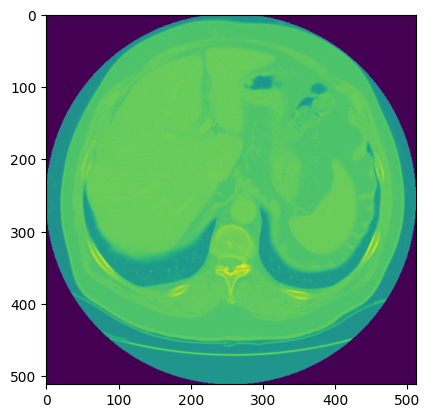

In [41]:
plt.imshow(xxx)

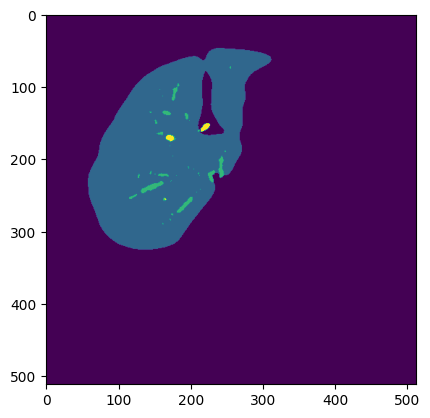

In [39]:
plt.imshow(xxx*255)

In [12]:
dx, dy, dz = np.gradient(aa[1])
edges_3d = np.sqrt(dx**2 + dy**2 + dz**2) > 0.5

h, w, s = ct.shape
X, Y, Z = np.mgrid[0:h, 0:w, 0:s]
X = X * spatial_res[0]
Y = Y * spatial_res[1]
Z = Z * spatial_res[2]
X, Y, Z = X[edges_3d], Y[edges_3d], Z[edges_3d]


values = ct[edges_3d].astype(np.float32)

fig = px.scatter_3d(x=X, y=Y, z=Z,
                    color=values,
                    color_continuous_scale=px.colors.sequential.gray)
fig.show()

NameError: name 'ct' is not defined

In [11]:
from skimage import io
import imageio
gif_path = 'animation.gif'
imageio.mimsave(gif_path, np.array(aa[0]).astype(np.uint8))

NameError: name 'mask' is not defined

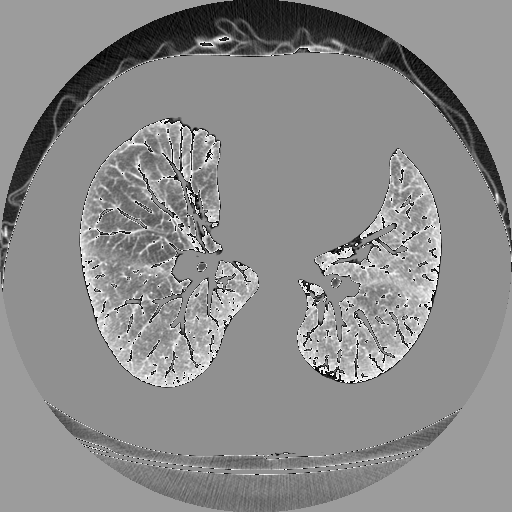

In [10]:
from IPython.display import Image as IPImage
IPImage(open(gif_path,'rb').read())

In [80]:
aa[0]

[array([[-2000, -2000, -2000, ..., -2000, -2000, -2000],
        [-2000, -2000, -2000, ..., -2000, -2000, -2000],
        [-2000, -2000, -2000, ..., -2000, -2000, -2000],
        ...,
        [-2000, -2000, -2000, ..., -2000, -2000, -2000],
        [-2000, -2000, -2000, ..., -2000, -2000, -2000],
        [-2000, -2000, -2000, ..., -2000, -2000, -2000]], dtype=int16),
 array([[-2000, -2000, -2000, ..., -2000, -2000, -2000],
        [-2000, -2000, -2000, ..., -2000, -2000, -2000],
        [-2000, -2000, -2000, ..., -2000, -2000, -2000],
        ...,
        [-2000, -2000, -2000, ..., -2000, -2000, -2000],
        [-2000, -2000, -2000, ..., -2000, -2000, -2000],
        [-2000, -2000, -2000, ..., -2000, -2000, -2000]], dtype=int16),
 array([[-2000, -2000, -2000, ..., -2000, -2000, -2000],
        [-2000, -2000, -2000, ..., -2000, -2000, -2000],
        [-2000, -2000, -2000, ..., -2000, -2000, -2000],
        ...,
        [-2000, -2000, -2000, ..., -2000, -2000, -2000],
        [-2000, -20

In [73]:
ala=np.multiply(aa[1],85)

In [69]:
bb[aa[1]==1]=255
bb[aa[1]==2]=180
bb[aa[1]==3]=100

In [70]:
np.max(bb[1:])

3

In [71]:
255/3

85.0